In [11]:
import yfinance as yf
import numpy as np, pandas as pd, matplotlib.pyplot as plt
# import math
from statsmodels.tsa.arima.model import ARIMA

In [12]:
df = yf.download('AAPL')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600
...,...,...,...,...,...,...
2023-11-24,190.869995,190.899994,189.250000,189.970001,189.970001,24048300
2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600
2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400


In [13]:
# Train test split

# Assign to_row 90% of the dataframe
to_row = int(len(df)*0.9)

# Store 90% of the dataframe in training_data
training_data = list(df[0:to_row]['Adj Close'])

# Store 10% of the dataframe in training_data
testing_data = list(df[to_row:]['Adj Close'])

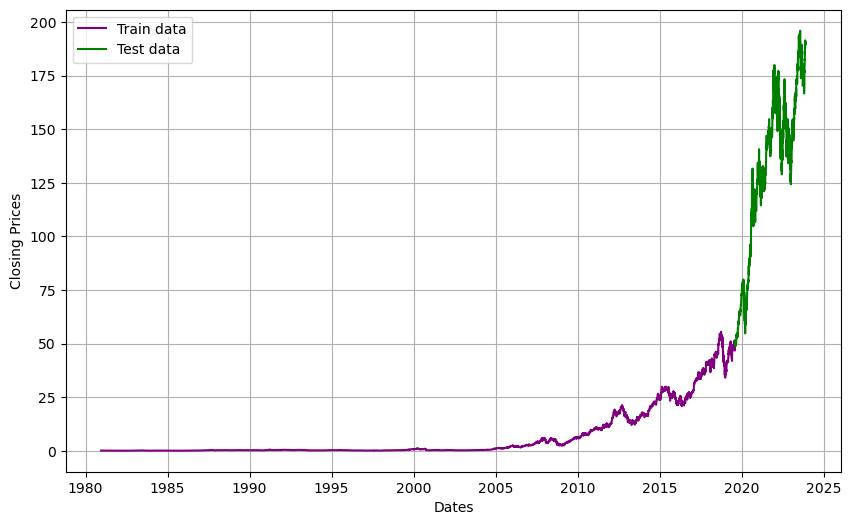

In [14]:
# Graph that shows data split into test and training set

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'purple', label='Train data')
plt.plot(df[to_row:]['Adj Close'], 'green', label='Test data')
plt.legend()

In [15]:
model_predictions = []

# Iterates the length of the testing data
for i in range(len(testing_data)):
    # print(i)

    # Create Model
    model = ARIMA(training_data, order = (4,1,0))

    # Train Model
    model_fit = model.fit()
    
    # Forecast next value of model 
    output = model_fit.forecast()

    # Add forecast prediction to model_predictions
    model_predictions.append(list(output))

    # Add current test value to training data
    training_data.append(testing_data[i])

print('complete')

c:\Users\hamil\Documents\Programming\anacondaz\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\hamil\Documents\Programming\anacondaz\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\hamil\Documents\Programming\anacondaz\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\hamil\Documents\Programming\anacondaz\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ham

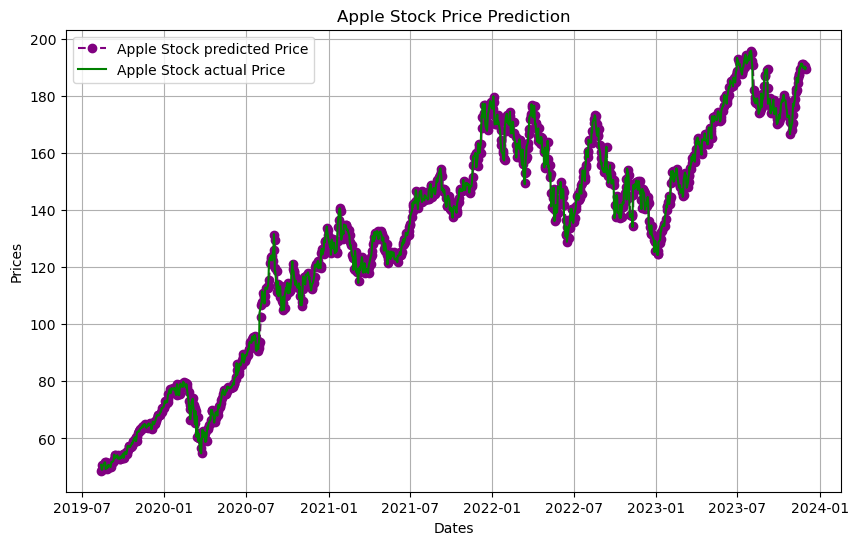

In [ ]:
# Graph that shows data split into test and training set

plt.figure(figsize=(10,6))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions, 'purple', marker = 'o', linestyle = 'dashed', label='Apple Stock predicted Price')
plt.plot(date_range, testing_data, 'green',label='Apple Stock actual Price')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

# Code based off of
# https://youtu.be/pryXhOgDY9A?si=-NFQlIFOc5ZcoNJx